# Proyecto Final de Statistical Learning 2 
Grupo: Jorge Yxcot, Naomi Lara y Héctor Aragón

In [1]:
import pandas as pd

dataframe = pd.read_csv('laptopData.csv')
print(dataframe)


      Unnamed: 0 Company            TypeName Inches  \
0            0.0   Apple           Ultrabook   13.3   
1            1.0   Apple           Ultrabook   13.3   
2            2.0      HP            Notebook   15.6   
3            3.0   Apple           Ultrabook   15.4   
4            4.0   Apple           Ultrabook   13.3   
...          ...     ...                 ...    ...   
1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300      1300.0  Lenovo            Notebook     14   
1301      1301.0      HP            Notebook   15.6   
1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                        

Revisión de Características de la Base de datos de laptops

In [2]:

# Mostrar las primeras 5 filas
print(dataframe.head())

# Información general del dataset
print(dataframe.info())

# Estadísticas descriptivas
print(dataframe.describe())


   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  

# Revisión de la Base de datos

Unnamed: 0: Parece ser un índice o identificador único para cada registro. Es posible que no necesites esta columna si ya cuentas con índices automáticos proporcionados por herramientas como pandas.

Company: Marca o fabricante del laptop (e.g., Apple, HP).

TypeName: Tipo o categoría del laptop (e.g., Ultrabook, Notebook).

Inches: Tamaño de la pantalla en pulgadas.

ScreenResolution: Resolución de la pantalla.

Cpu: Especificación del procesador.

Ram: Cantidad de memoria RAM.

Memory: Tipo y capacidad de almacenamiento (e.g., SSD, Flash Storage).

Gpu: Tarjeta gráfica o GPU.

OpSys: Sistema operativo.

Weight: Peso del laptop.

Price: Precio del laptop: 
        count: Hay un total de 1273 registros en esta columna.
        mean: El precio promedio de un laptop en este dataset es aproximadamente 59955.81 (la moneda no está especificada, pero supongamos que son unidades monetarias UM).
        std: La desviación estándar es 37332.25 UM, lo que indica que hay una variabilidad considerable en los precios de los laptops.
        min: El laptop más barato cuesta 9270.72 UM.
        25%: El 25% de los laptops cuesta 31914.72 UM o menos.
        50%: La mediana del precio es 52161.12 UM. Esto significa que el 50% de los laptops cuestan menos que este valor y el 50% cuesta más.
        75%: El 75% de los laptops cuesta 79333.39 UM o menos.
        max: El laptop más caro en este dataset cuesta 324954.72 UM.





## Buscar Nulos o casos perdidos

In [3]:
# Busqueda de valores nulos
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)


Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [4]:
#Eliminar Nulos
dataframe.dropna(inplace=True)


In [5]:
#Demostración de elminación de Nulos
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [6]:

#Como afecta la eliminación de filas NULL: no hay impacto 

print(dataframe.describe())


        Unnamed: 0          Price
count  1273.000000    1273.000000
mean    652.674784   59955.814073
std     376.493027   37332.251005
min       0.000000    9270.720000
25%     327.000000   31914.720000
50%     652.000000   52161.120000
75%     980.000000   79333.387200
max    1302.000000  324954.720000


In [7]:
#Eliminar la columna unnamed
dataframe.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
#Revision:
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [9]:
# Otras librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
for column in dataframe.select_dtypes(include=['object']):
    print("\nFrecuencias para la columna:", column)
    print(dataframe[column].value_counts())



Frecuencias para la columna: Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

Frecuencias para la columna: TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: TypeName, dtype: int64

Frecuencias para la columna: Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64

Frecuencias para la co

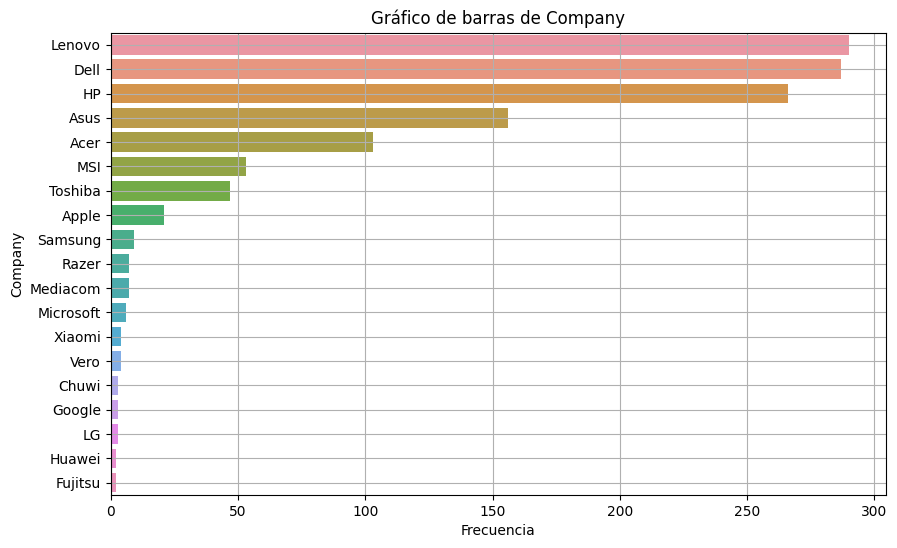

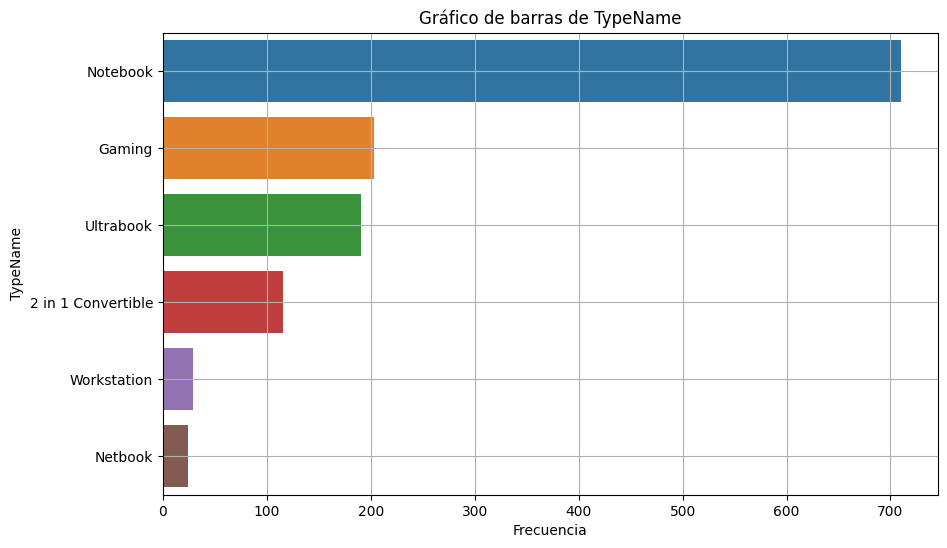

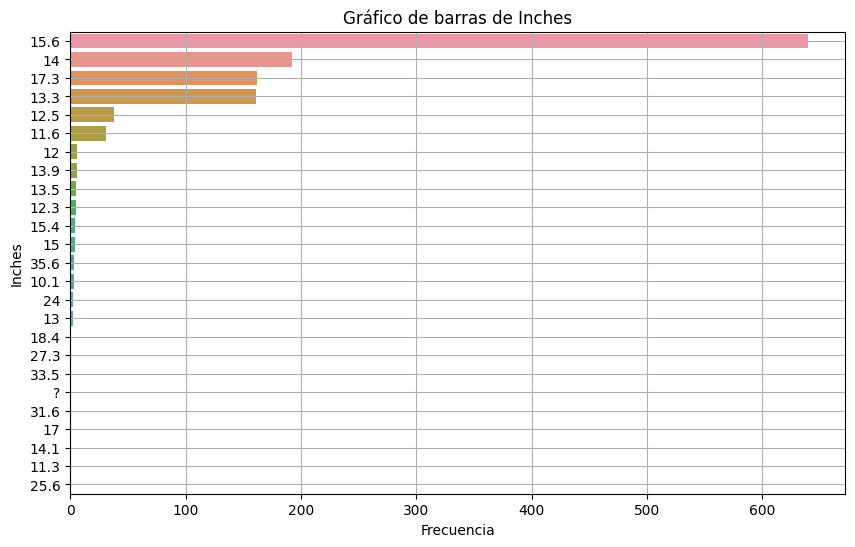

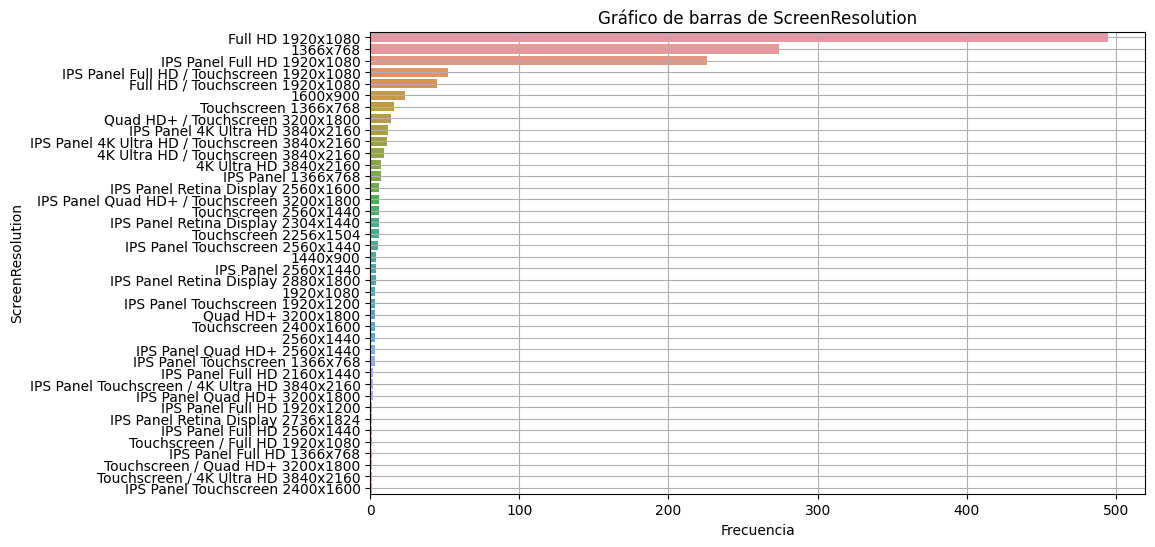

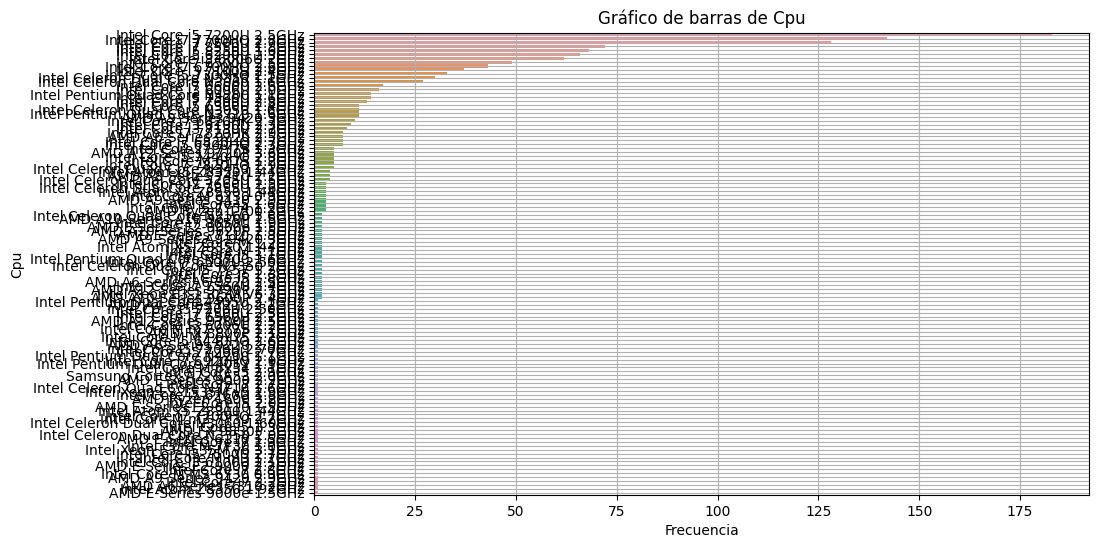

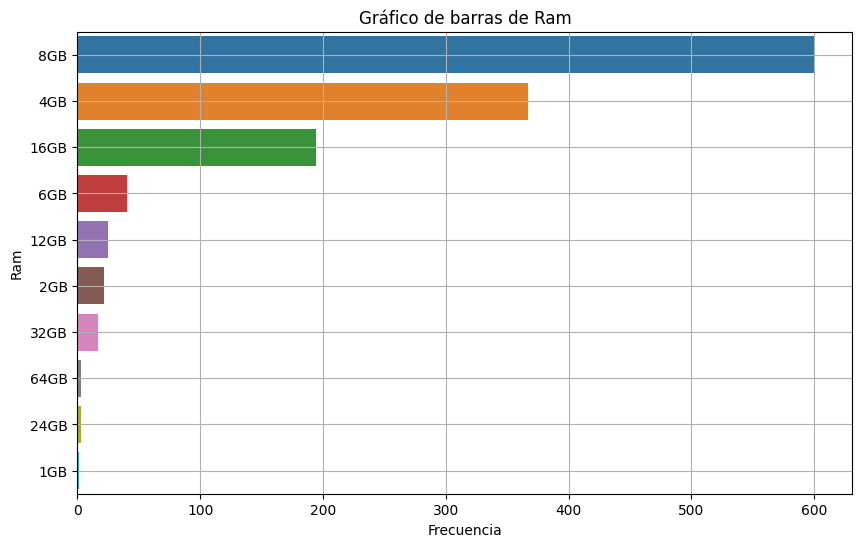

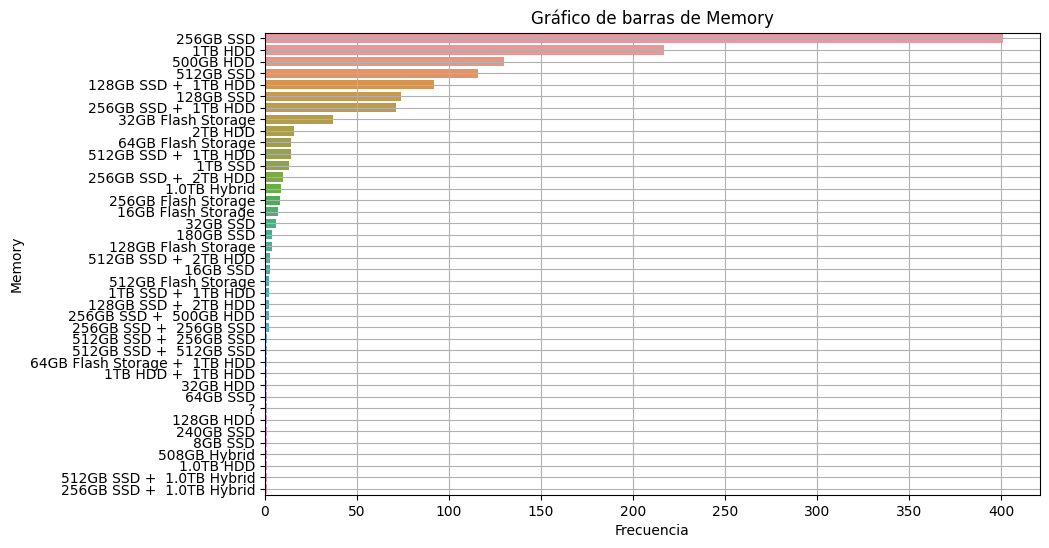

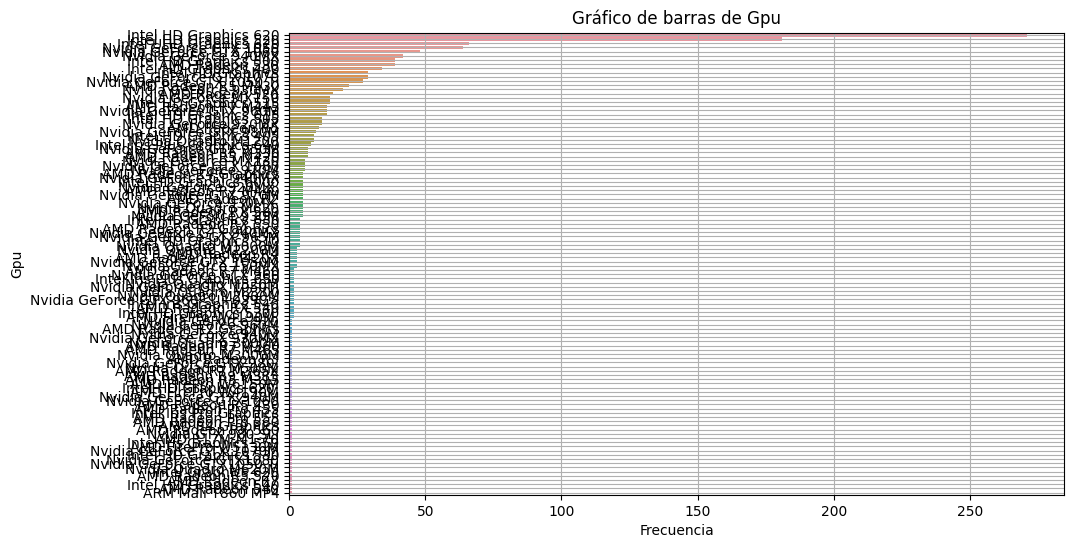

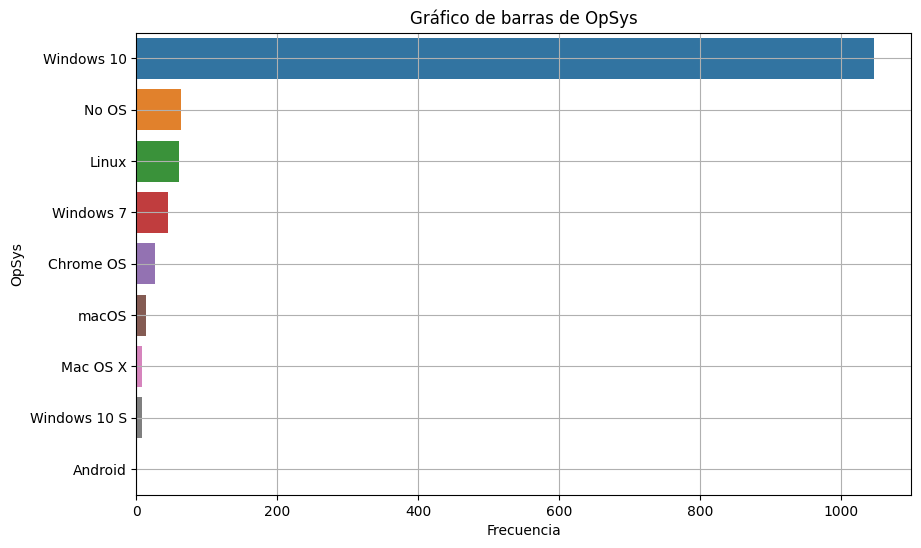

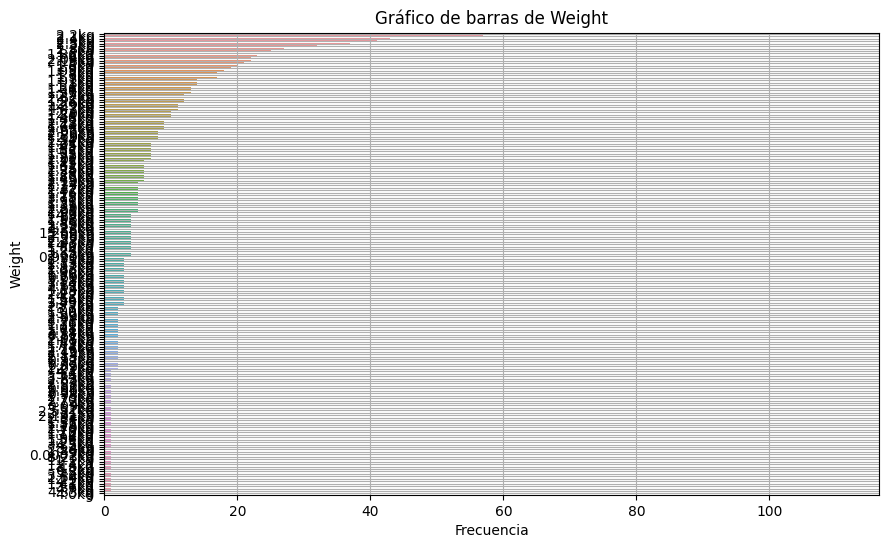

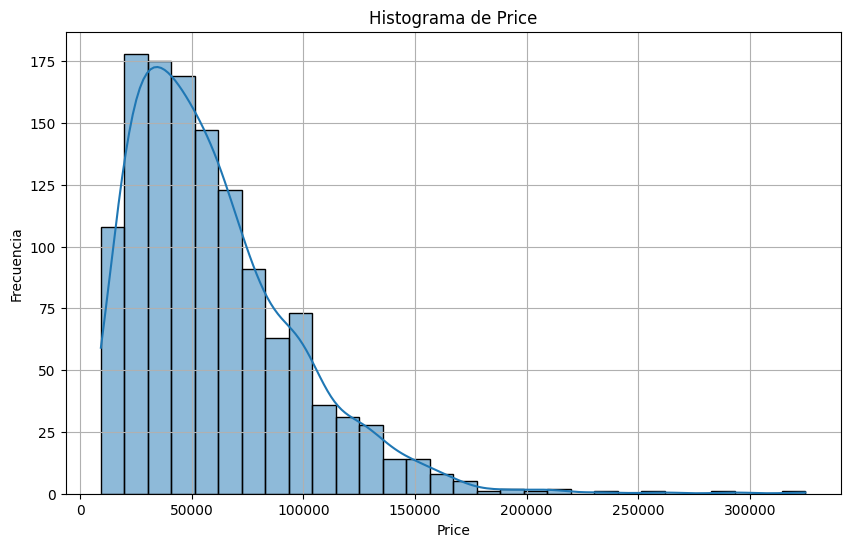

In [11]:
for column in dataframe:
    if dataframe[column].dtype in ['int64', 'float64']:  # Histogramas para columnas numéricas
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[column], bins=30, kde=True)  # `kde=True` añade una estimación de densidad al histograma
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:  # Gráficos de barras para columnas categóricas
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, y=column, order=dataframe[column].value_counts().index)
        plt.title(f'Gráfico de barras de {column}')
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


# Limpieza:

In [12]:

#Cambiando los valores ?
dataframe.replace('?', pd.NA, inplace=True)


In [13]:
frequency_inches = dataframe['Inches'].value_counts()
print(frequency_inches)


15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64


### Hacer una copia de la Base de Datos

In [14]:
# Hacer una copia de base de datos original
df = dataframe.copy()


### Limpiando la columna Company

In [15]:
df['Company'] = df['Company'].replace('Vero', 'Aourus')

In [16]:
frecuencias = df['Company'].value_counts()
print(frecuencias)

Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Aourus         4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64


### Dividiendo y limpiado la columna Screen Resolution

In [17]:
import re

# Crear una copia de tu dataframe
df = dataframe.copy()

# Inicializar las nuevas columnas
df['IPS'] = 'No'
df['Touchscreen'] = 'No'
df['Resolution_Type'] = None
df['Resolution'] = None

# Función para procesar cada fila de la columna 'ScreenResolution'
def process_resolution(row):
    # Si tiene 'IPS Panel'
    if 'IPS Panel' in row:
        df.at[index, 'IPS'] = 'Yes'
        row = row.replace('IPS Panel', '').strip()
    
    # Si tiene 'Touchscreen'
    if 'Touchscreen' in row:
        df.at[index, 'Touchscreen'] = 'Yes'
        row = row.replace('Touchscreen', '').strip()
    
    # Buscar y asignar el tipo de resolución
    resolution_types = ['4K Ultra HD', 'Full HD', 'Quad HD+', 'Retina Display']
    for r_type in resolution_types:
        if r_type in row:
            df.at[index, 'Resolution_Type'] = r_type
            row = row.replace(r_type, '').strip()
            break  # Romper el ciclo una vez se ha encontrado el tipo de resolución

    # Asignar la resolución específica
    resolution_pattern = re.compile(r"\d+x\d+")
    match = resolution_pattern.search(row)
    if match:
        df.at[index, 'Resolution'] = match.group()

# Aplicar la función
for index, row in df['ScreenResolution'].iteritems():
    process_resolution(row)

# Visualizar el DataFrame después de procesar
print(df[['ScreenResolution', 'IPS', 'Touchscreen', 'Resolution_Type', 'Resolution']].head())


                     ScreenResolution  IPS Touchscreen Resolution_Type  \
0  IPS Panel Retina Display 2560x1600  Yes          No  Retina Display   
1                            1440x900   No          No            None   
2                   Full HD 1920x1080   No          No         Full HD   
3  IPS Panel Retina Display 2880x1800  Yes          No  Retina Display   
4  IPS Panel Retina Display 2560x1600  Yes          No  Retina Display   

  Resolution  
0  2560x1600  
1   1440x900  
2  1920x1080  
3  2880x1800  
4  2560x1600  


C:\Users\JEYxc\AppData\Local\Temp\ipykernel_13144\732047206.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df['ScreenResolution'].iteritems():


In [18]:
print(df)

     Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300           

### Limpiando y ajustando la columna Inches

In [19]:
# Imputar los NaN con el valor de la media
df['Inches'].fillna(15, inplace=True)

# Convertir la columna a float (si es que no lo es ya)
df['Inches'] = df['Inches'].astype(float)



In [20]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
dtypes: float64(2), object(13)
memory usage: 191.4+ KB
None


### Limpiando y separando la columna CPU

In [21]:
def categorize_cpu_manufacturer(cpu):
    if 'AMD' in cpu:
        return 'AMD'
    elif 'Intel' in cpu:
        return 'Intel'
    elif 'Samsung' in cpu:
        return 'Samsung'
    else:
        return 'Others'

df['CPU_Manufacturer'] = df['Cpu'].apply(categorize_cpu_manufacturer)

def categorize_cpu_series(cpu):
    intel_series = ["Intel Core i3", "Intel Core i5", "Intel Core i7", "Intel Core i9", "Intel Core M", "Intel Xeon", "Intel Pentium", "Intel Celeron", "Intel Atom"]
    amd_series = ["AMD A-Series", "AMD FX", "AMD Ryzen", "AMD E-Series"]
    
    for series in intel_series:
        if series in cpu:
            return series
    for series in amd_series:
        if series in cpu:
            return series

    return 'Others'

df['CPU_Series'] = df['Cpu'].apply(categorize_cpu_series)

import re

def categorize_cpu_speed(cpu):
    speed_pattern = re.compile(r'(\d+\.\d+)GHz')
    match = speed_pattern.search(cpu)
    
    if match:
        speed = float(match.group(1))
        if speed < 2:
            return 'Baja'
        elif 2 <= speed <= 3:
            return 'Media'
        else:
            return 'Alta'
    else:
        return 'Unknown'

df['CPU_Speed_Range'] = df['Cpu'].apply(categorize_cpu_speed)

def extract_cpu_identifier(cpu):
    speed_pattern = re.compile(r'(\d+\.\d+)GHz')
    if speed_pattern.search(cpu):
        return speed_pattern.search(cpu).group(1) + "GHz"
    else:
        return 'Unknown'

df['CPU_Identifier'] = df['Cpu'].apply(extract_cpu_identifier)


In [22]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
 15  CPU_Manufacturer  1273 non-null   object 
 16  CPU_Series        1273 non-null   object 


### Limpiando la columna RAM y convertirla a numero

In [23]:
# Remover "GB" y convertir a int
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [24]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
 15  CPU_Manufacturer  1273 non-null   object 
 16  CPU_Series        1273 non-null   object 


### Limpieza y Separador de la Columna Memory en 4

In [25]:

memory_data = {
    'Memory_Size1': [],
    'Memory_Type1': [],
    'Memory_Size2': [],
    'Memory_Type2': []
}

def extract_size(size_str):
    if 'GB' in size_str:
        return int(size_str.replace('GB', '').strip())
    elif 'TB' in size_str:
        return int(float(size_str.replace('TB', '').strip()) * 1000)
    else:
        return None

def split_memory(row):
    # Verificar si la fila es NaN
    if pd.isna(row):
        memory_data['Memory_Size1'].append(None)
        memory_data['Memory_Type1'].append(None)
        memory_data['Memory_Size2'].append(None)
        memory_data['Memory_Type2'].append(None)
        return

    # Si hay un '+' en la cadena, entonces hay dos tipos de memorias
    if '+' in row:
        memory1, memory2 = row.split('+')
    else:
        memory1 = row
        memory2 = None

    # Extrayendo tamaño y tipo de la primera memoria
    size1, type1 = memory1.strip().split(' ', 1)
    memory_data['Memory_Size1'].append(extract_size(size1))
    memory_data['Memory_Type1'].append(type1.strip())

    # Extrayendo tamaño y tipo de la segunda memoria si existe
    if memory2:
        size2, type2 = memory2.strip().split(' ', 1)
        memory_data['Memory_Size2'].append(extract_size(size2))
        memory_data['Memory_Type2'].append(type2.strip())
    else:
        memory_data['Memory_Size2'].append(None)
        memory_data['Memory_Type2'].append(None)

# Aplicar la función a cada fila de la columna 'Memory'
df['Memory'].apply(split_memory)

# Agregar las nuevas columnas al DataFrame df
df['Memory_Size1'] = memory_data['Memory_Size1']
df['Memory_Type1'] = memory_data['Memory_Type1']
df['Memory_Size2'] = memory_data['Memory_Size2']
df['Memory_Type2'] = memory_data['Memory_Type2']


In [26]:
print(df)

     Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
130

### Limpiando y separando la Columna GPU

In [27]:
# Crear columnas separadas para Fabricante, Serie y Modelo

df['Manufacturer'] = df['Gpu'].apply(lambda x: 'AMD' if 'AMD' in x else ('Intel' if 'Intel' in x else ('Nvidia' if 'Nvidia' in x else 'Other')))
df['Series'] = df['Gpu'].apply(lambda x: 'FirePro' if 'FirePro' in x else ('Radeon' if 'Radeon' in x else ('HD Graphics' if 'HD Graphics' in x else ('GeForce' if 'GeForce' in x else ('Quadro' if 'Quadro' in x else 'Other')))))

# Aplicar la función de reemplazo fila por fila
def get_model(row):
    return row['Gpu'].replace('AMD', '').replace('Nvidia', '').replace('Intel', '').replace(row['Series'], '').strip()

df['Model'] = df.apply(get_model, axis=1)

print(df.head())


  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  ...     CPU_Series  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg  ...  Intel Core i5   
1        Intel HD Graphics 6000  macOS  1.34kg  ...  Intel Core i5   
2         Intel HD Graphic

### Limpiando OpSys 

In [28]:
df['OpSys'] = df['OpSys'].replace('Windows 10 S', 'Windows 10')

# Verificar si el cambio fue hecho correctamente
print(df[df['OpSys'] == 'Windows 10'].head())


   Company   TypeName  Inches             ScreenResolution  \
5     Acer   Notebook    15.6                     1366x768   
8     Asus  Ultrabook    14.0            Full HD 1920x1080   
9     Acer  Ultrabook    14.0  IPS Panel Full HD 1920x1080   
13    Dell   Notebook    15.6            Full HD 1920x1080   
16    Dell   Notebook    15.6            Full HD 1920x1080   

                           Cpu  Ram     Memory                     Gpu  \
5      AMD A9-Series 9420 3GHz    4  500GB HDD           AMD Radeon R5   
8   Intel Core i7 8550U 1.8GHz   16  512GB SSD    Nvidia GeForce MX150   
9   Intel Core i5 8250U 1.6GHz    8  256GB SSD  Intel UHD Graphics 620   
13    Intel Core i3 6006U 2GHz    4  256GB SSD      AMD Radeon R5 M430   
16  Intel Core i7 7500U 2.7GHz    8  256GB SSD      AMD Radeon R5 M430   

         OpSys Weight  ...     CPU_Series CPU_Speed_Range CPU_Identifier  \
5   Windows 10  2.1kg  ...         Others         Unknown        Unknown   
8   Windows 10  1.3kg  ...  In

### Limpiando la columna Weight 

In [29]:
# Imputar los NaN con el valor de la media
df['Weight'].fillna(2, inplace=True)
# Eliminar "kg" y convertir la columna a float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# Verificar el cambio
print(df['Weight'].head())


0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64


### Convirtiendo de Rupias a Dolares y a Quetzales

In [30]:
# Tasas de cambio
rupia_to_dollar = 0.013
dollar_to_quetzal = 7.7

# Convertir la columna 'Price' de Rupias a Dólares
df['Price_in_dollars'] = df['Price'] * rupia_to_dollar

# Convertir la columna 'Price_in_dollars' de Dólares a Quetzales
df['Price_in_quetzales'] = df['Price_in_dollars'] * dollar_to_quetzal

# Verificar el cambio
print(df.head())


  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  ...  CPU_Identifier  \
0  Intel Iris Plus Graphics 640  macOS    1.37  ...          2.3GHz   
1        Intel HD Graphics 6000  macOS    1.34  ...          1.8GHz   
2         Intel HD Grap

# Resultados de la Limpieza

In [31]:

# Mostrar las primeras 5 filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  ...  CPU_Identifier  \
0  Intel Iris Plus Graphics 640  macOS    1.37  ...          2.3GHz   
1        Intel HD Graphics 6000  macOS    1.34  ...          1.8GHz   
2         Intel HD Grap

### Revisando posibles Correlaciones

In [32]:
correlation_matrix = df.corr()
print(correlation_matrix)


                      Inches       Ram    Weight     Price  Memory_Size1  \
Inches              1.000000  0.142140  0.494965  0.044525      0.185773   
Ram                 0.142140  1.000000  0.283302  0.685648      0.011946   
Weight              0.494965  0.283302  1.000000  0.175928      0.149207   
Price               0.044525  0.685648  0.175928  1.000000     -0.126002   
Memory_Size1        0.185773  0.011946  0.149207 -0.126002      1.000000   
Memory_Size2       -0.047910  0.029462 -0.177168 -0.020726      0.054045   
Price_in_dollars    0.044525  0.685648  0.175928  1.000000     -0.126002   
Price_in_quetzales  0.044525  0.685648  0.175928  1.000000     -0.126002   

                    Memory_Size2  Price_in_dollars  Price_in_quetzales  
Inches                 -0.047910          0.044525            0.044525  
Ram                     0.029462          0.685648            0.685648  
Weight                 -0.177168          0.175928            0.175928  
Price                  

C:\Users\JEYxc\AppData\Local\Temp\ipykernel_13144\1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### One Hot Encoding

In [33]:
# Convertir todo el DataFrame a one-hot encoding
df_encoded = pd.get_dummies(df)

print(df_encoded)


      Inches  Ram  Weight        Price  Memory_Size1  Memory_Size2  \
0       13.3    8    1.37   71378.6832         128.0           NaN   
1       13.3    8    1.34   47895.5232         128.0           NaN   
2       15.6    8    1.86   30636.0000         256.0           NaN   
3       15.4   16    1.83  135195.3360         512.0           NaN   
4       13.3    8    1.37   96095.8080         256.0           NaN   
...      ...  ...     ...          ...           ...           ...   
1298    14.0    4    1.80   33992.6400         128.0           NaN   
1299    13.3   16    1.30   79866.7200         512.0           NaN   
1300    14.0    2    1.50   12201.1200          64.0           NaN   
1301    15.6    6    2.19   40705.9200        1000.0           NaN   
1302    15.6    4    2.20   19660.3200         500.0           NaN   

      Price_in_dollars  Price_in_quetzales  Company_Acer  Company_Apple  ...  \
0           927.922882         7145.006188             0              1  ...   

In [34]:
df_encoded.head()

,Inches,Ram,Weight,Price,Memory_Size1,Memory_Size2,Price_in_dollars,Price_in_quetzales,Company_Acer,Company_Apple,...,Model_R7 M465,Model_R9 M385,Model_RX 540,Model_RX 550,Model_RX 560,Model_RX 580,Model_U 620,Model_W4190M,Model_W5130M,Model_W6150M
0,13.3,8,1.37,71378.6832,128.0,NaN,927.922882,7145.006188,0,1,...,0,0,0,0,0,0,0,0,0,0
1,13.3,8,1.34,47895.5232,128.0,NaN,622.641802,4794.341872,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15.6,8,1.86,30636.0000,256.0,NaN,398.268000,3066.663600,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,16,1.83,135195.3360,512.0,NaN,1757.539368,13533.053134,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13.3,8,1.37,96095.8080,256.0,NaN,1249.245504,9619.190381,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_encoded.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'Memory_Size1', 'Memory_Size2',
       'Price_in_dollars', 'Price_in_quetzales', 'Company_Acer',
       'Company_Apple',
       ...
       'Model_R7 M465', 'Model_R9 M385', 'Model_RX 540', 'Model_RX 550',
       'Model_RX 560', 'Model_RX 580', 'Model_U 620', 'Model_W4190M',
       'Model_W5130M', 'Model_W6150M'],
      dtype='object', length=537)

In [36]:
from summarytools import dfSummary
dfSummary(df_encoded)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Inches[float64],Mean (sd) : 15.1 (2.0)min < med < max:10.1 < 15.6 < 35.6IQR (CV) : 1.6 (7.7),24 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB6klEQVR4nO3cTW7CMBRF4eeWosDAUYTEJroDFtHFdgkdsAJ2wAwJRUZQ0kJwZ52VHydpuOh8c4MHRwgP3nMxRgPu3VPfFwCuMej7Auc450ZmNkw8/h1j3Ld5H/TnbkN1zo0mk8mb975IOb/ZbErn3DuxPoa7DdXMht77Yjab7fM8r245GELI5vN5sV6vh2ZGqA/gnkM1M7M8z6vpdPqZcHTU+mXQGx5TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokNDpIt+GO/j96XR6afM+0NVZqE138B8Oh6yu69eqqj7MLGXjNB5Il7+oyTv4zcyWy2WxWCzGx+PxuYvLQUvnO/xTd/CXZckOfvziMQUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJF4f7GszmM5eP1pwNtclsPnP5aNOlX9Tk2Xzm8tGmq+b6U2bzmctHm3hMQQKhQgKhQsJV/1FDCNmtH7zdbjMzs91ul61Wq/F/ng8hZHVdD8zMO+du/Wr04yvG+OeD/QcUzn1iSdccKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Ram[int32],1. 82. 43. 164. 65. 126. 27. 328. 649. 2410. 1,601 (47.2%)367 (28.8%)194 (15.2%)40 (3.1%)25 (2.0%)22 (1.7%)17 (1.3%)3 (0.2%)3 (0.2%)1 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD3UlEQVR4nO3dQWrcZgCG4V+DSevNDMbgI7Q7H2AO0cP2EHMAL3sHY6xFJ81mumgcnCaGQqx3LPd5dtn9hBcJCX3j6XQ6DShszn0A/j/ERkZsZMRGRmxkxEZGbGTERkZsZKYxxuUY48O5D/LGfTqdTsdzH2LtLq6vr3/bbrdX5z7IWzbP88M0Tb8L7sdcbLfbq/1+f9ztdh/PfZi36PHx8efD4XB1f3//YYwhth9wMcYYu93u483NzZ/nPswbdnnuA7wHHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIXIzxz2c05z7IW+X/5vVczPP8cDgcrobPaF40z/PDGOPTuc+xdj4L/298Fv4KJr9iRGWtVzZXmhVa5eDFAGWdVjd4MUBZr7UOXjw5r5CXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGRWN3hZ01n52ioHLwYo6+SzcDIGL2SKK5urEGOMYPBinMKTRQcvxik8VwxeVvOUy7K81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKLrqssoXhu8XWVJRRPbBDIWFeReenK5mrEq/vuusoiiiV8s66yiGIpL62rLKJ4dV7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkflm8GKkwlK+O3gxUmEJPgsnY/BC5t9XNlc0FvPV4MXQhSVtngYv+/3++Dm6tf05SFbiy+Dl878NXViMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFv0LL/Dc88GLoQuL8lk4GYMXMh4QyLiNkrGuImNdRca6iowHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8j4LJyMdRWZ51c2VzUW9WXwYuzC0jbb7fbq9vZ2GLuwtM0YY1xeXv517oPw/nmpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmYzxhjH4/Gncx+E928zz/PD3d2dsQuL81k4GYMXMh4QyIiNzGaapl+nafLzCyxuM8b4ZYzh1QeLcxslIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzGWP8McbwA84szuCFjNsoGbGRMXghY/BCxm2UjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcybqNkxEbG4IWMwQsZt1EyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iozbKBmxkREbGbGRERsZsZERGxmxkfkb9B9hW0/fu8UAAAAASUVORK5CYII="">",0(0.0%)
3,Weight[float64],Mean (sd) : 2.1 (0.8)min < med < max:0.0 < 2.0 < 11.1IQR (CV) : 0.8 (2.6),180 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACUElEQVR4nO3dMY7aQBiG4X/CggwoY1mWoOMCkVJQ+hB72LTpUnACbkCDkBAY4eBgjFOlTBbbkPXHvk8/gwWvjCl+xlVVZUDXfXrvCwBu8fLIzZ1zQzMbtNjiXFXV6V7XA10PC9U5N4zj+NV7HzXd43A47Jxz34gVj7yjDrz3UZIkpzAM87qL0zQNFotFtN1uB2ZGqB/cQ7/6zczCMMwnk8nPhsuHd70YyOLHFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ8/FSUNsqy7JuZd841Wc5hak+ks6FmWdYviuLrbDbr9Xq92udUcZjac+lsqOfz+SUIgtF8Ps+n0+muzloOU3s+nQ31j/F43PRANQ5TeyL8mIIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEN0dRnHNDMxs02Ntfr9d+g3V30XKC1Ywp1k75Z6jOuWEcx6/e+6juxkVRBGVZfsnz/IeZNZl5aqztBKsZU6xd89YddeC9j5IkOYVhWOsDX61W0XK5HF0ul16L62ukzQSrGVOsXXTTFGoYhrUnQXe73btPgbaYYLWyLL3x5xedcVOoaZoGdTc+Ho+BmVmWZcFmsxn9z/VtX3u9Xn9u8+iw3++PzrnvZtboseOD+lVV1V/fr99yT8eg8nz9SAAAAABJRU5ErkJggg=="">",1(0.1%)
4,Price[float64],Mean (sd) : 59955.8 (37332.3)min < 

In [37]:
df_encoded.dropna(inplace=True)
df_encoded.fillna(df_encoded.mean(), inplace=True)
#las columnas con valores na pueden afectar el desmepeño del modelo, por lo que llenamos los valores na con el valor medio para evitar sesgar los datos.

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras


X = df_encoded.drop("Price_in_quetzales", axis=1)  # Features
y = df_encoded["Price_in_quetzales"]  # Target

# Dividir en rangos (etiquetas)
bins = [-np.inf, 100, 200, 300, 400, np.inf]
labels = [0, 1, 2, 3, 4]
y = pd.cut(y, bins=bins, labels=labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir resultados para almacenar métricas de cada modelo
results = []

# Realizamos pruebas variando el número de capas
for num_layers in range(1, 5):
    model = keras.Sequential()
    
    # Agregamos capas ocultas al modelo
    for _ in range(num_layers):
        model.add(keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=30, validation_split=0.3, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    results.append((num_layers, test_accuracy))

# Mostrar resultados
for num_layers, accuracy in results:
    print(f"Número de capas: {num_layers}, Precisión en conjunto de prueba: {accuracy:.4f}")

print("Precisión en el conjunto de prueba:", test_accuracy)


Número de capas: 1, Precisión en conjunto de prueba: 0.8392
Número de capas: 2, Precisión en conjunto de prueba: 0.9650
Número de capas: 3, Precisión en conjunto de prueba: 0.9510
Número de capas: 4, Precisión en conjunto de prueba: 1.0000
Precisión en el conjunto de prueba: 1.0


Número de capas: 1, Precisión en conjunto de prueba: 0.3357
Número de capas: 2, Precisión en conjunto de prueba: 0.6014
Número de capas: 3, Precisión en conjunto de prueba: 1.0000
Número de capas: 4, Precisión en conjunto de prueba: 1.0000
Precisión en el conjunto de prueba: 1.0


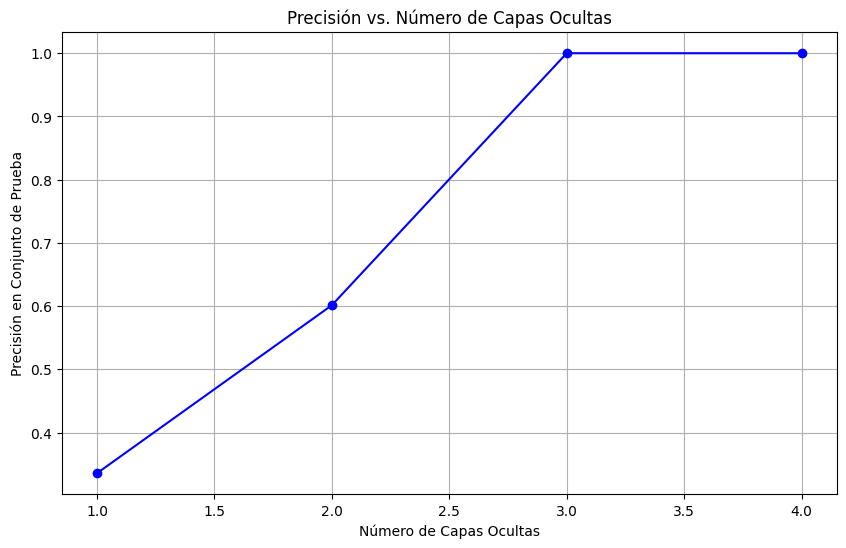

In [41]:
X = df_encoded.drop("Price_in_quetzales", axis=1)  # Features
y = df_encoded["Price_in_quetzales"]  # Target

# Etiquetas
bins = [-np.inf, 100, 200, 300, 400, np.inf]
labels = [0, 1, 2, 3, 4]
y = pd.cut(y, bins=bins, labels=labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Escalamos características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
num_layers_list = []
accuracy_list = []

# Realizamos pruebas variando el número de capas
for num_layers in range(1, 5):
    model = keras.Sequential()
    
    # Agregar capas ocultas al modelo
    for _ in range(num_layers):
        model.add(keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=30, validation_split=0.3, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    results.append((num_layers, test_accuracy))
    num_layers_list.append(num_layers)
    accuracy_list.append(test_accuracy)

# Mostrar resultados
for num_layers, accuracy in results:
    print(f"Número de capas: {num_layers}, Precisión en conjunto de prueba: {accuracy:.4f}")

print("Precisión en el conjunto de prueba:", test_accuracy)

# Graficamos la precisión en función del número de capas
plt.figure(figsize=(10, 6))
plt.plot(num_layers_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Precisión vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión en Conjunto de Prueba')
plt.grid(True)
plt.show()


Número de neuronas: 10, Precisión en conjunto de prueba: 0.4336
Número de neuronas: 100, Precisión en conjunto de prueba: 0.9231
Número de neuronas: 200, Precisión en conjunto de prueba: 0.9860
Número de neuronas: 300, Precisión en conjunto de prueba: 0.9860
Número de neuronas: 500, Precisión en conjunto de prueba: 1.0000
Número de neuronas: 1000, Precisión en conjunto de prueba: 1.0000


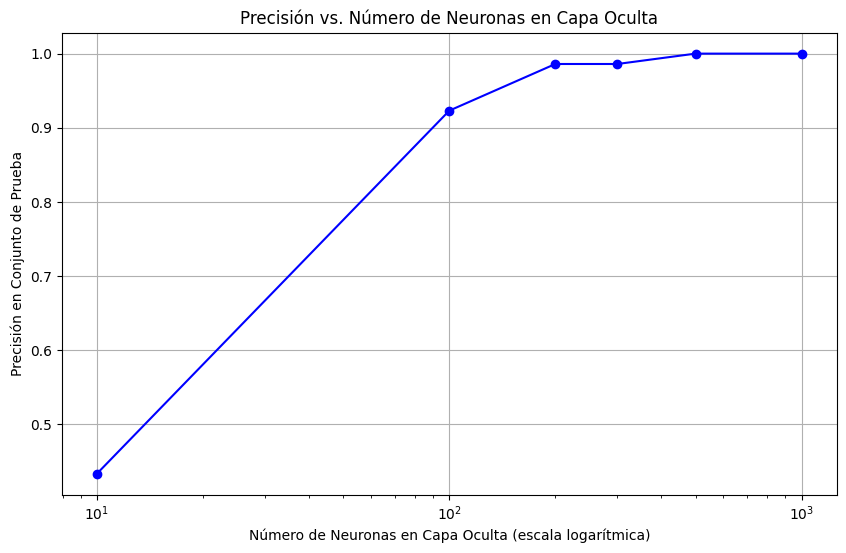

In [42]:
X = df_encoded.drop("Price_in_quetzales", axis=1)  # Features
y = df_encoded["Price_in_quetzales"]  # Target

# Dividir en rangos (etiquetas)
bins = [-np.inf, 100, 200, 300, 400, np.inf]
labels = [0, 1, 2, 3, 4]
y = pd.cut(y, bins=bins, labels=labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
num_neurons_list = []
accuracy_list = []

# Realizamos pruebas variando el número de neuronas por capa
for num_neurons in [10, 100, 200, 300, 500, 1000]:
    model = keras.Sequential()
    
    # Agregar una capa oculta al modelo con el número de neuronas actual
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=30, validation_split=0.3, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    results.append((num_neurons, test_accuracy))
    num_neurons_list.append(num_neurons)
    accuracy_list.append(test_accuracy)

# Mostrar resultados
for num_neurons, accuracy in results:
    print(f"Número de neuronas: {num_neurons}, Precisión en conjunto de prueba: {accuracy:.4f}")

# Graficamos la precisión en función del número de neuronas
plt.figure(figsize=(10, 6))
plt.semilogx(num_neurons_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Precisión vs. Número de Neuronas en Capa Oculta')
plt.xlabel('Número de Neuronas en Capa Oculta (escala logarítmica)')
plt.ylabel('Precisión en Conjunto de Prueba')
plt.grid(True)
plt.show()


Número de épocas: 10, Precisión en conjunto de prueba: 0.9860
Número de épocas: 100, Precisión en conjunto de prueba: 0.9860
Número de épocas: 500, Precisión en conjunto de prueba: 0.9930
Número de épocas: 1000, Precisión en conjunto de prueba: 1.0000
Número de épocas: 5000, Precisión en conjunto de prueba: 0.9860


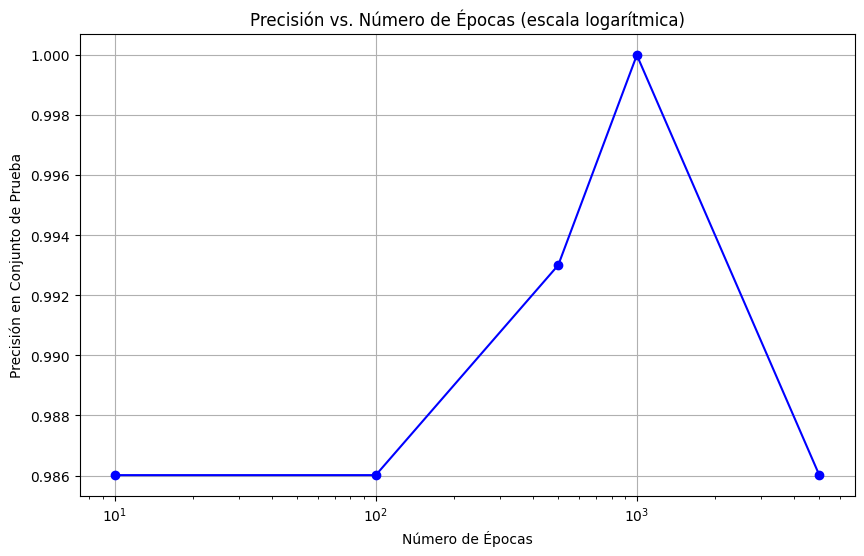

In [43]:
X = df_encoded.drop("Price_in_quetzales", axis=1)  # Features
y = df_encoded["Price_in_quetzales"]  # Target

bins = [-np.inf, 100, 200, 300, 400, np.inf]
labels = [0, 1, 2, 3, 4]
y = pd.cut(y, bins=bins, labels=labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
num_epochs_list = []
accuracy_list = []

# Realizamos pruebas variando el número de épocas de manera logarítmica
for num_epochs in [10, 100, 500, 1000, 5000]:
    model = keras.Sequential()
    
    # Agregamos una capa oculta al modelo con un número fijo de neuronas
    model.add(keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=30, validation_split=0.3, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    results.append((num_epochs, test_accuracy))
    num_epochs_list.append(num_epochs)
    accuracy_list.append(test_accuracy)

# Mostrar resultados
for num_epochs, accuracy in results:
    print(f"Número de épocas: {num_epochs}, Precisión en conjunto de prueba: {accuracy:.4f}")

# Graficamos la precisión en función del número de épocas (escala logarítmica)
plt.figure(figsize=(10, 6))
plt.semilogx(num_epochs_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Precisión vs. Número de Épocas (escala logarítmica)')
plt.xlabel('Número de Épocas')
plt.ylabel('Precisión en Conjunto de Prueba')
plt.grid(True)
plt.show()
